In [233]:
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE

In [234]:
churn = pd.read_excel('Churn.xlsx')

In [191]:
churn.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [192]:
churn.shape

(7043, 21)

In [193]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [194]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Null values

In [195]:
churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [235]:
churn['TotalCharges'] = pd.to_numeric(churn.TotalCharges)

In [236]:
churn[np.isnan(churn['TotalCharges'])]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

In [198]:
churn[churn['tenure'] == 0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

Tenure column is 0 for these entries even though the MonthlyCharges column is not empty.
There are no other 0 in the Tenure column.

delete the rows with missing values since there are only 11 rows and deleting them will not affect the data.

In [199]:
churn=churn.dropna()

In [200]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [201]:
churn.shape

(7032, 21)

In [202]:
churn['SeniorCitizen'] = churn['SeniorCitizen'].astype(np.object)

# EDA

Text(0.5, 1.0, 'Churn vs Not Churn')

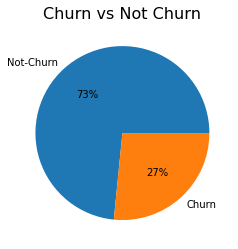

In [36]:
churn_percent = churn.Churn.value_counts() / len(churn.Churn)
labels = 'Not-Churn', 'Churn'

fig, ax = plt.subplots()
ax.pie(churn_percent, labels=labels, autopct='%.f%%')  
ax.set_title('Churn vs Not Churn', fontsize=16)

churn rate of Telco from this dataset is 27% that means this is an imbalanced dataset.

In [38]:
import plotly.express as px
fig = px.histogram(churn, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Maximum customer with Month-to-Month Contract opted to move out as compared to customrs with One Year Contract and Two Year Contract

In [39]:
fig = px.histogram(churn, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Customers without dependents are more likely to churn

In [40]:
fig = px.histogram(churn, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Most customers churn in the absence of online security

In [41]:
fig = px.histogram(churn, x="Churn", color="PaperlessBilling",  title="<b>Chrun distribution w.r.t. Paperless Billing</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

People with Paperless Billing are likely to churn.

In [42]:
fig = px.histogram(churn, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Customers with no TechSupport are most likely to churn.

In [43]:
fig = px.box(churn, x='Churn', y = 'tenure')
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
fig.update_xaxes(title_text='Churn', row=1, col=1)
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

customers with less tenure (new customers) are more likely to churn

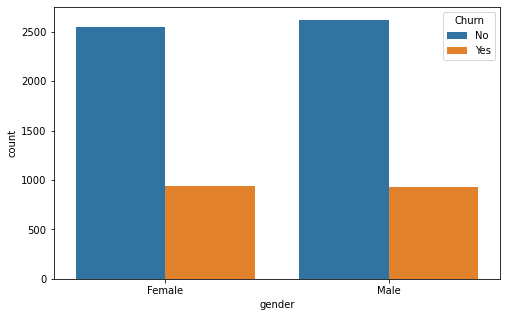

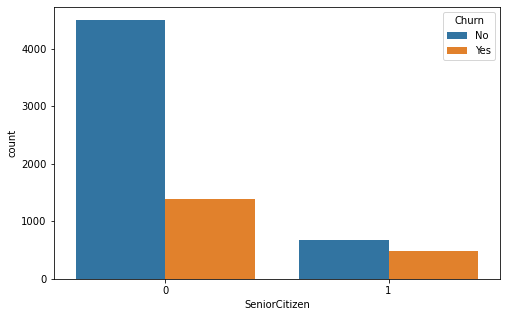

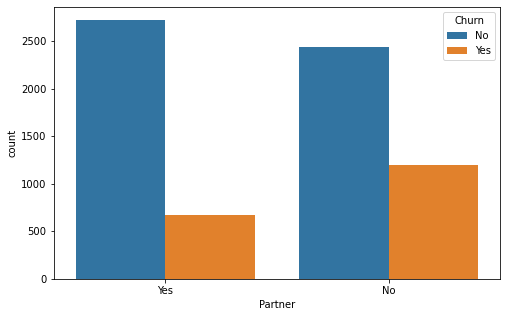

In [46]:
for col in ['gender', 'SeniorCitizen', 'Partner']:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, hue='Churn', data=churn, palette="tab10")
    plt.show()

The churn rate is almost same between male and female, indicating gender may not be a good predictor.

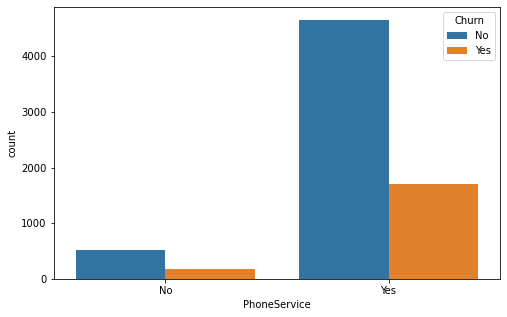

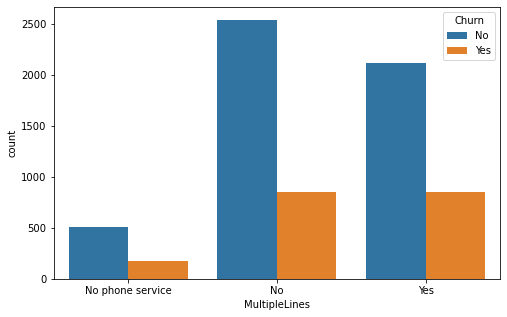

In [47]:
for col in ['PhoneService', 'MultipleLines']:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, hue='Churn', data=churn, palette="tab10")
    plt.show()

PhoneService is a redundant feature as we can get the same information from Multiple Lines column. So, we could drop this column.

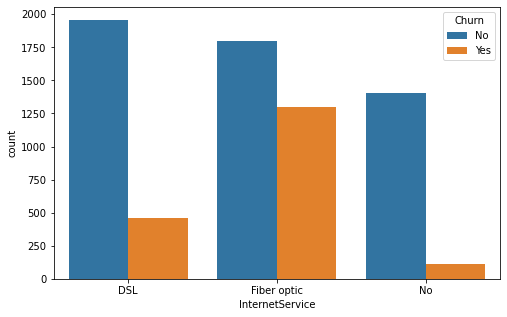

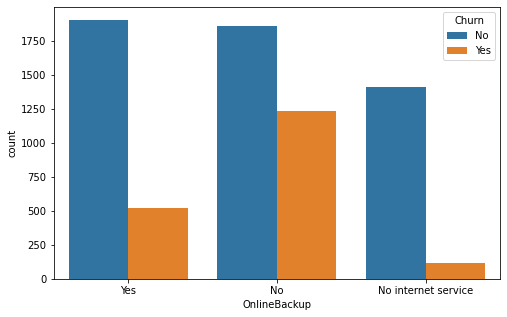

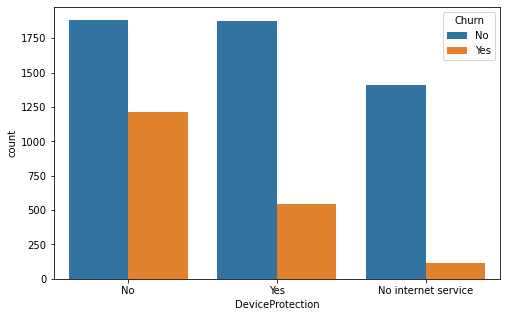

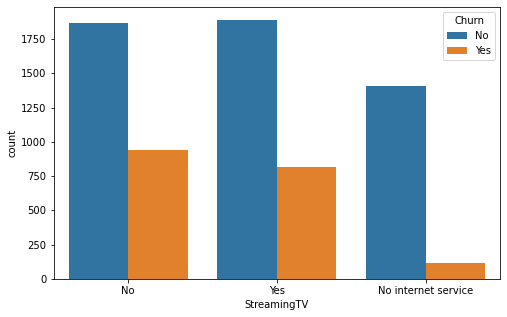

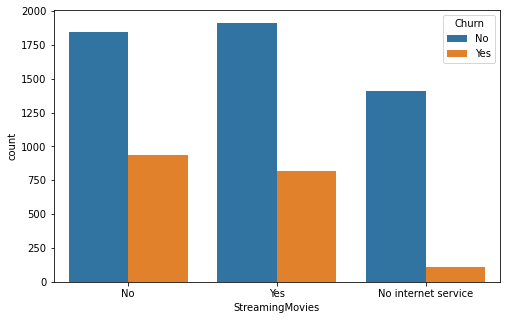

In [48]:
for col in ['InternetService', 'OnlineBackup', 'DeviceProtection',
            'StreamingTV', 'StreamingMovies']:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, hue='Churn', data=churn, palette="tab10")
    plt.show()

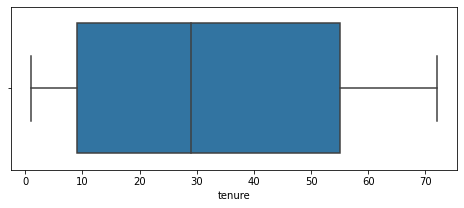

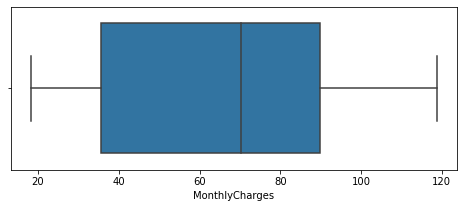

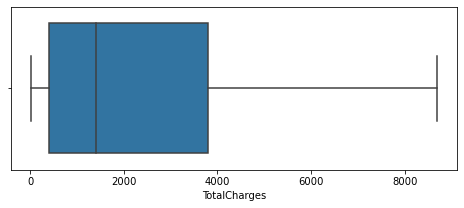

In [50]:
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    fig = plt.figure(figsize=(8,3))
    sns.boxplot(churn[col])

boxplot shows that there is no outliers

In [83]:
for item in churn.columns:
    print(item)
    print (churn[item].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (autom

In [237]:
churn = churn.drop(['customerID'], axis = 1)
churn = churn.drop(['gender'], axis = 1)

In [238]:
#churn["gender"].replace(['Female','Male'],[0,1],inplace=True)
churn["Partner"].replace(['No', 'Yes'], [0, 1], inplace=True)
churn["Dependents"].replace(['No', 'Yes'], [0, 1], inplace=True)
churn["PhoneService"].replace(['No', 'Yes'], [0, 1], inplace=True)
churn["PaperlessBilling"].replace(['No', 'Yes'], [0, 1], inplace=True)
churn["Churn"].replace(['No', 'Yes'], [0, 1], inplace=True)
churn["StreamingMovies"].replace(['No', 'Yes'], [0, 1], inplace=True)

churn["InternetService"].replace(['No','DSL', 'Fiber optic'],[0,1,2],inplace=True)
churn["Contract"].replace(['Month-to-month','One year', 'Two year'],[0,1,2],inplace=True)


In [239]:
churn = pd.get_dummies(data=churn, columns=['PaymentMethod'])

churn["MultipleLines"].replace(['No','Yes'],[0,1],inplace=True)
churn["OnlineSecurity"].replace(['No','Yes'],[0,1],inplace=True)
churn["OnlineBackup"].replace(['No','Yes'],[0,1],inplace=True)
churn["DeviceProtection"].replace(['No','Yes'],[0,1],inplace=True)
churn["TechSupport"].replace(['No', 'Yes'], [0, 1], inplace=True)
churn["StreamingTV"].replace(['No', 'Yes'], [0, 1], inplace=True)

In [240]:
columns_to_convert = ['MultipleLines', 
                      'OnlineSecurity', 
                      'OnlineBackup', 
                      'DeviceProtection', 
                      'TechSupport',
                      'StreamingTV',
                     'StreamingMovies']

for item in columns_to_convert:
    churn[item].replace(to_replace='No internet service',  value=0, inplace=True)
    churn[item].replace(to_replace='No phone service',  value=0, inplace=True)

In [207]:
churn.head()

SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  \
0             0        1           0       1             0              0   
1             0        0           0      34             1              0   
2             0        0           0       2             1              0   
3             0        0           0      45             0              0   
4             0        0           0       2             1              0   

   InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0                1               0             1                 0  ...   
1                1               1             0                 1  ...   
2                1               1             1                 0  ...   
3                1               1             0                 1  ...   
4                2               0             0                 0  ...   

   StreamingMovies  Contract  PaperlessBilling  MonthlyCharges  TotalCharges  \
0                0         0                 1           29.85         29.85   
1                0         1                 0           56.95       1889.50   
2                0         0                 1           53.85        108.15   
3                0         1                 0           42.30       1840.75   
4                0         0                 1           70.70        151.65   

   Churn  PaymentMethod_Bank transfer (automatic)  \
0      0                                        0   
1      0                                        0   
2      1                                        0   
3      0                                        1   
4      1                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 22 columns]

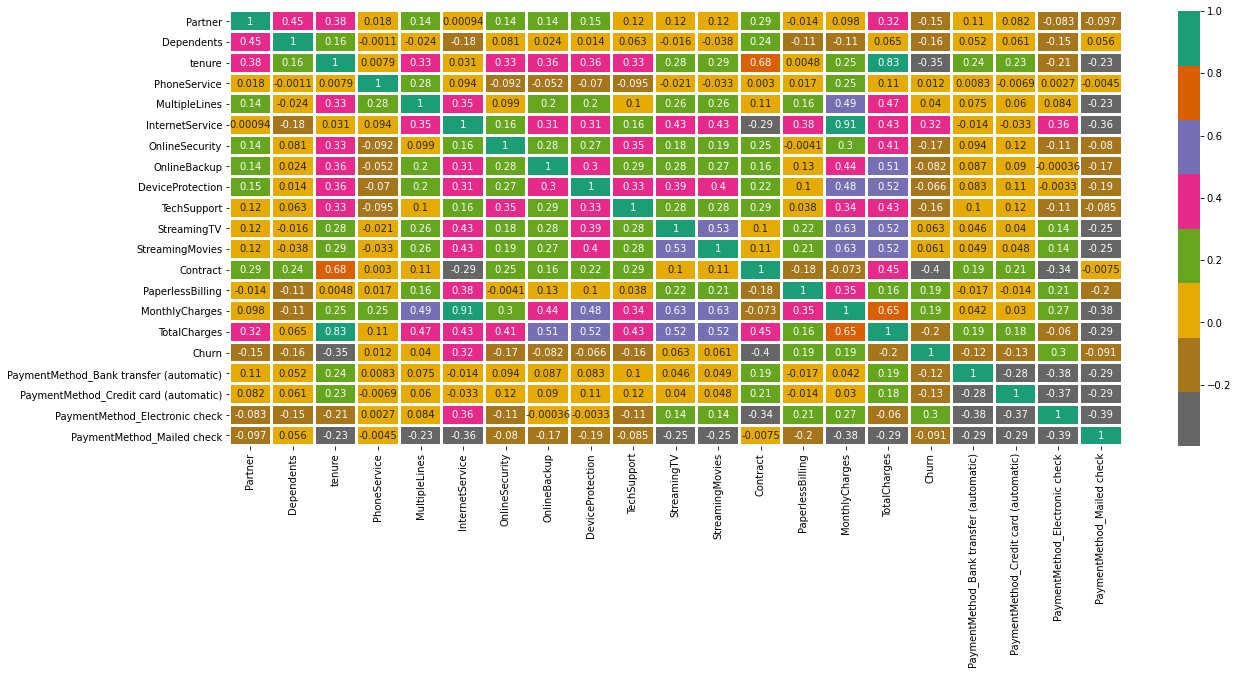

In [89]:
plt.figure(figsize=(20,8)) 
sns.heatmap(churn.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [90]:
corr_matrix=abs(churn.corr())
print(corr_matrix['Churn'].sort_values(ascending=False))

Churn                                      1.000000
Contract                                   0.396150
tenure                                     0.354049
InternetService                            0.316350
PaymentMethod_Electronic check             0.301455
TotalCharges                               0.199484
MonthlyCharges                             0.192858
PaperlessBilling                           0.191454
OnlineSecurity                             0.171270
TechSupport                                0.164716
Dependents                                 0.163128
Partner                                    0.149982
PaymentMethod_Credit card (automatic)      0.134687
PaymentMethod_Bank transfer (automatic)    0.118136
PaymentMethod_Mailed check                 0.090773
OnlineBackup                               0.082307
DeviceProtection                           0.066193
StreamingTV                                0.063254
StreamingMovies                            0.060860
MultipleLine

In [241]:
churn = churn.drop(['PhoneService'], axis = 1)
churn = churn.drop(['TotalCharges'], axis = 1)


In [242]:
churn = churn.drop(['MonthlyCharges'], axis = 1)

In [138]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(random_state = 0)

In [243]:
X = churn.drop('Churn', axis=1)
y = churn['Churn']

In [179]:
model.fit(X,y)

ExtraTreesClassifier(random_state=0)

In [180]:
x = model.feature_importances_
x

array([0.03123984, 0.04084654, 0.03138315, 0.33402809, 0.03782241,
       0.07788843, 0.03453928, 0.03848785, 0.0389403 , 0.03577113,
       0.03632705, 0.0371633 , 0.09953374, 0.03706816, 0.01349602,
       0.01414649, 0.04981675, 0.01150147])

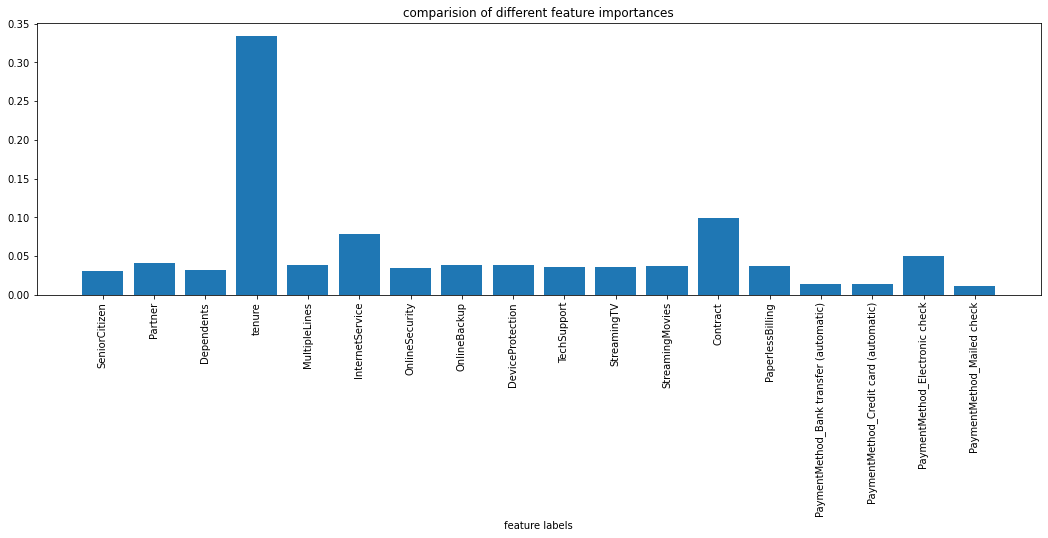

In [181]:
f, ax = plt.subplots(figsize=(18,5))
plt.bar(X.columns,x)
plt.xticks(rotation=90)
plt.xlabel('feature labels')
plt.title('comparision of different feature importances')
plt.show()

In [214]:
churn.dtypes

SeniorCitizen                               object
Partner                                      int64
Dependents                                   int64
tenure                                     float32
MultipleLines                                int64
InternetService                              int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
Contract                                     int64
PaperlessBilling                             int64
Churn                                        int64
PaymentMethod_Bank transfer (automatic)      uint8
PaymentMethod_Credit card (automatic)        uint8
PaymentMethod_Electronic check               uint8
PaymentMethod_Mailed check                   uint8
dtype: object

In [244]:
churn['tenure'] = pd.to_numeric(churn.tenure,downcast='float')

In [245]:
num_cols = ["tenure"]

In [246]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_std = pd.DataFrame(StandardScaler().fit_transform(churn[num_cols].astype('float64')),
                       columns=num_cols)

In [247]:
df_std.head()

tenure
0 -1.277445
1  0.066327
2 -1.236724
3  0.514251
4 -1.236724

In [248]:
sm = SMOTE()
X_train, y_train = sm.fit_resample(X, y)

In [250]:
X_train_sm, X_test, y_train_sm, y_test = train_test_split(X_train,y_train,test_size = 0.30, random_state = 40)

In [251]:
scaler= StandardScaler()

X_train_sm[num_cols] = scaler.fit_transform(X_train_sm[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [252]:
X_train_sm

SeniorCitizen  Partner  Dependents    tenure  MultipleLines  \
10325              0        0           0 -0.867843              1   
1384               0        1           0 -0.246112              0   
7204               0        0           1 -1.116536              0   
103                1        1           0  1.577634              0   
10324              0        1           0  1.577634              1   
...              ...      ...         ...       ...            ...   
7839               1        1           0  0.748659              1   
3603               0        0           0 -1.075087              0   
5959               0        1           1  0.209825              0   
5426               0        1           0  0.955903              1   
7608               1        0           0 -0.494804              1   

       InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
10325                1               0             0                 0   
1384                 2               0             0                 0   
7204                 0               0             0                 0   
103                  1               0             1                 1   
10324                2               0             1                 1   
...                ...             ...           ...               ...   
7839                 2               0             0                 1   
3603                 1               0             0                 0   
5959                 0               0             0                 0   
5426                 1               0             0                 0   
7608                 2               0             0                 0   

       TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
10325            1            0                1         0                 0   
1384             0            0                0         0                 1   
7204             0            0                0         0                 0   
103              0            1                0         1                 0   
10324            0            1                1         0                 1   
...            ...          ...              ...       ...               ...   
7839             0            1                1         0                 1   
3603             0            0                0         0                 0   
5959             0            0                0         2                 0   
5426             1            1                1         2                 1   
7608             0            1                1         0                 1   

       PaymentMethod_Bank transfer (automatic)  \
10325                                        0   
1384                                         0   
7204                                         0   
103                                          1   
10324                                        0   
...                                        ...   
7839                                         0   
3603                                         0   
5959                                         0   
5426                                         1   
7608                                         0   

       PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
10325                                      0                               1   
1384                                       0                               1   
7204                                       0                               0   
103                                        0                               0   
10324                                      1                               0   
...                                      ...                             ...   
7839                                       0                               1   
3603                                       0                               

In [253]:
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.model_selection import ShuffleSplit,train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler

In [223]:
sm = SMOTE()
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [254]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
#from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier

#Bagging Algo
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [255]:
lr = LogisticRegression(C=5.0)
knn = KNeighborsClassifier(weights='distance', algorithm='auto', n_neighbors=15)
rfc = RandomForestClassifier(n_estimators=200,criterion='gini', n_jobs=-1)
dtc = DecisionTreeClassifier()
bnb = BernoulliNB()
xgb = XGBClassifier(n_jobs=-1)
#cat = CatBoostClassifier(verbose=0)
ada = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
svc = svm.SVC(kernel = 'poly', C=4, gamma='scale', degree = 2)

In [256]:
from sklearn.metrics import roc_auc_score,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, plot_confusion_matrix

In [257]:
def train_model(model):
    # Checking accuracy
    model = model.fit(X_train_sm, y_train_sm)
    pred = model.predict(X_test)
    print('accuracy_score',accuracy_score(y_test, pred)*100)
    print('precision_score',precision_score(y_test, pred)*100)
    print('recall_score',recall_score(y_test, pred)*100)
    print('f1_score',f1_score(y_test, pred)*100)
    print('roc_auc_score',roc_auc_score(y_test, pred)*100)
    # confusion matrix
    print('confusion_matrix')
    print(pd.DataFrame(confusion_matrix(y_test, pred)))
    fpr, tpr, threshold = roc_curve(y_test, pred)
    roc_auc = auc(fpr, tpr)*100

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

accuracy_score 80.74074074074075
precision_score 80.25439127801333
recall_score 82.96806512210394
f1_score 81.58866995073892
roc_auc_score 80.67501399341272
confusion_matrix
      0     1
0  1182   326
1   272  1325


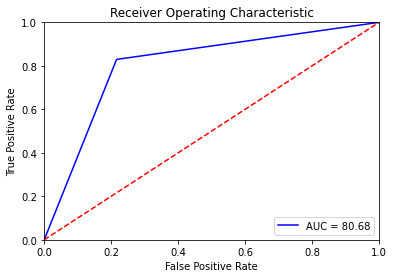

In [258]:
train_model(lr)


accuracy_score 80.35426731078906
precision_score 79.71101745936183
recall_score 82.90544771446461
f1_score 81.27685696746471
roc_auc_score 80.27898380418192
confusion_matrix
      0     1
0  1171   337
1   273  1324


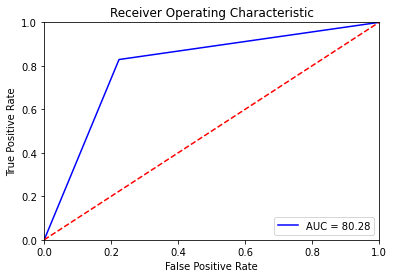

In [259]:
train_model(dtc)

accuracy_score 84.89533011272141
precision_score 84.30656934306569
recall_score 86.7877269881027
f1_score 85.52915766738661
roc_auc_score 84.83948683622641
confusion_matrix
      0     1
0  1250   258
1   211  1386


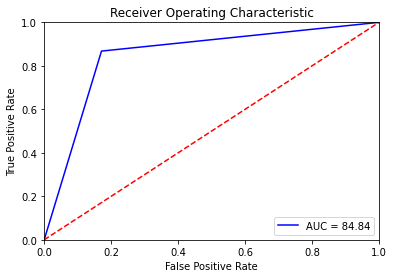

In [260]:
train_model(rfc)

[22:36:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 83.63929146537842
precision_score 82.86059143029571
recall_score 85.97370068879148
f1_score 84.38844499078057
roc_auc_score 83.57040472105356
confusion_matrix
      0     1
0  1224   284
1   224  1373


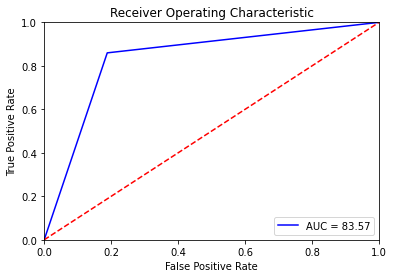

In [261]:
train_model(xgb)

accuracy_score 81.09500805152979
precision_score 79.1907514450867
recall_score 85.78584846587351
f1_score 82.35647730688308
roc_auc_score 80.95658471039035
confusion_matrix
      0     1
0  1148   360
1   227  1370


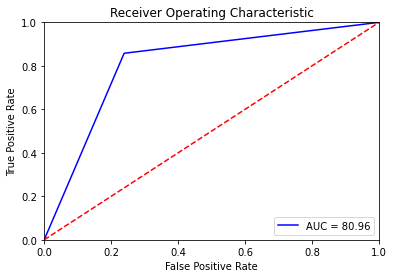

In [262]:
train_model(ada)

accuracy_score 81.67471819645733
precision_score 80.30660377358491
recall_score 85.28490920475892
f1_score 82.72092317036137
roc_auc_score 81.56818404535028
confusion_matrix
      0     1
0  1174   334
1   235  1362


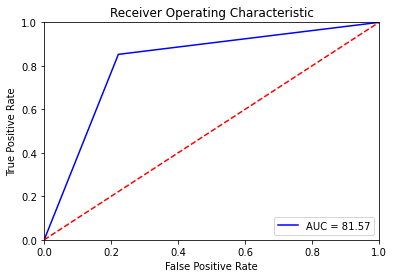

In [263]:
train_model(gbc)

accuracy_score 81.83574879227054
precision_score 78.61495844875346
recall_score 88.85410144020037
f1_score 83.42151675485007
roc_auc_score 81.62864223203653
confusion_matrix
      0     1
0  1122   386
1   178  1419


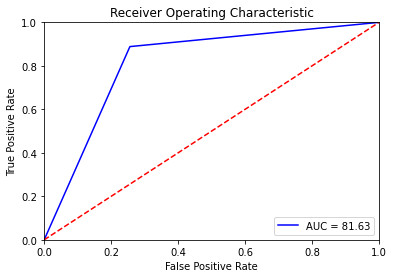

In [264]:
train_model(knn)

accuracy_score 81.64251207729468
precision_score 81.6
recall_score 83.03068252974327
f1_score 82.30912476722533
roc_auc_score 81.60154816142337
confusion_matrix
      0     1
0  1209   299
1   271  1326


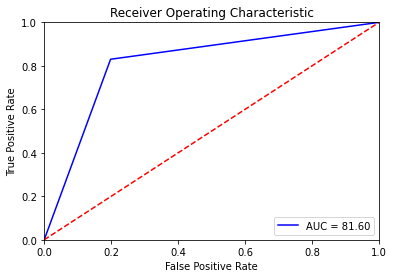

In [265]:
mlp = MLPClassifier()
train_model(mlp)

accuracy_score 80.77294685990339
precision_score 78.93518518518519
recall_score 85.41014402003756
f1_score 82.04511278195488
roc_auc_score 80.63610649277739
confusion_matrix
      0     1
0  1144   364
1   233  1364


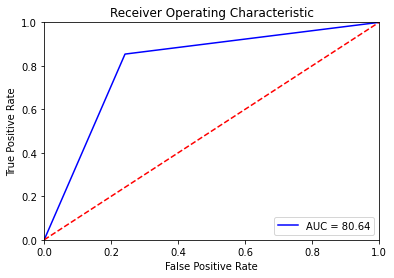

In [266]:
train_model(svc)

In [268]:
y_head_lr = lr.predict(X_test)
y_head_rfc = rfc.predict(X_test)
y_head_xgb = xgb.predict(X_test)
y_head_ada = ada.predict(X_test)
y_head_dtc = dtc.predict(X_test)
y_head_gbc = gbc.predict(X_test)
#y_head_cat = cat.predict(X_test)
y_head_knn = knn.predict(X_test)
#y_head_nb = bnb.predict(X_test)
y_head_mlp = mlp.predict(X_test)
y_head_svm = svc.predict(X_test)

In [269]:
cm_lr = confusion_matrix(y_test,y_head_lr)
cm_rfc = confusion_matrix(y_test,y_head_rfc)
cm_xgb = confusion_matrix(y_test,y_head_xgb)
cm_ada = confusion_matrix(y_test,y_head_ada)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_gbc = confusion_matrix(y_test,y_head_gbc)
#cm_cat = confusion_matrix(y_test,y_head_cat)

cm_knn = confusion_matrix(y_test,y_head_knn)
#cm_nb = confusion_matrix(y_test,y_head_nb)
cm_mlp = confusion_matrix(y_test,y_head_mlp)
cm_svm = confusion_matrix(y_test,y_head_svm)


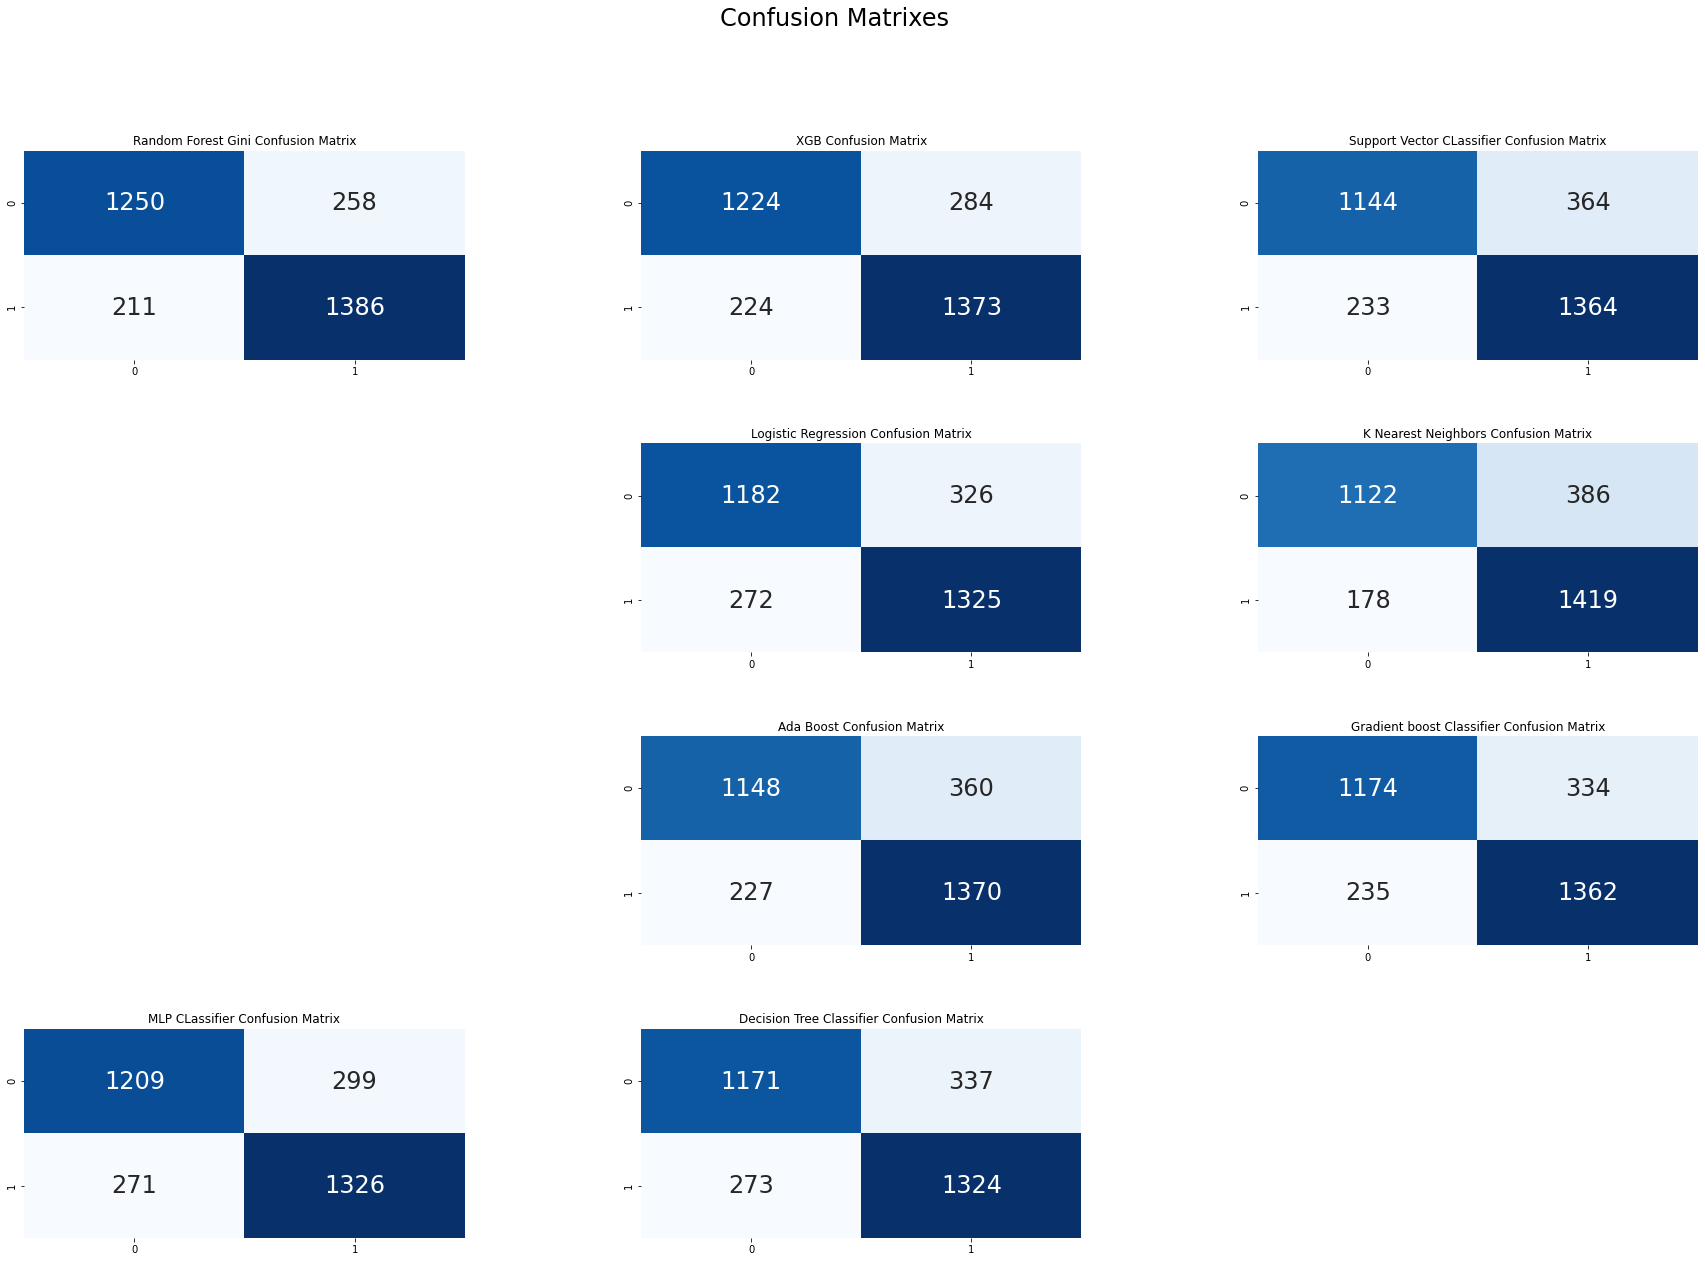

In [270]:
plt.figure(figsize=(30,20))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(4,3,5)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,6)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,2)
plt.title("XGB Confusion Matrix")
sns.heatmap(cm_xgb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.subplot(4,3,11)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,1)
plt.title("Random Forest Gini Confusion Matrix")
sns.heatmap(cm_rfc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,8)
plt.title("Ada Boost Confusion Matrix")
sns.heatmap(cm_ada,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,9)
plt.title("Gradient boost Classifier Confusion Matrix")
sns.heatmap(cm_gbc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,10)
plt.title("MLP CLassifier Confusion Matrix")
sns.heatmap(cm_mlp,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,3)
plt.title("Support Vector CLassifier Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()



We will use Random Forest Classifer as it is giving Good Accuracy and it gives less error rate than all other Alogorithms

Select those variables in the models which does not show multicollinearity, which are higlhly correlated with target variable and we can also check the feature importance and does not include those which does not show any behavior which will affect target variable (like customer id, gender)

Key factors that predict customer churn? Do these factors make sense?

In a subscription-based business, even a small rate of monthly/quarterly churn will compound quickly over time. Just 1 percent monthly churn translates to almost 12 percent yearly churn. Given that it’s far more expensive to acquire a new customer than to retain an existing one, businesses with high churn rates will quickly find themselves in a financial hole as they have to devote more and more resources to new customer acquisition.
There are some factors which predict customer churn like internetService(Customer who use Fiber optic are more likely to churn against who use DSL), PaperlessBilling and etc (mentioned in E.D.A) and variable like gender does not help in predicting the customer churn. 
The factors make sense as well can improve on the particulr variables because of which customers are likely to churn

Offers to avail to the customers

-Most of customer who have paperless billing leaves company, so we should offer proper bill to the customers

-Customers with no TechSupport are most likely to migrate to another service provider so we should provie them proper tech supoort

-Most customers churn in the absence of online security so we should provide every customer

-A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service so improving the internet service is really important.

-Customers not having partner are more likey to churn so we can give them some good offers to stay